## Imports 

In [1]:
from SETUP import *
from REDUCE_FEATURES import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
data_file = '/Users/Winnifred/Desktop/Capstone/ICPSR_20240_RAWDATA/DS0001/20240-0001-Data.tsv'
filenames = '/Users/Winnifred/Desktop/Capstone/diagnosis_capstone/data/feature_group_file_names.txt'
csv_root_path = '/Users/Winnifred/Desktop/Capstone/diagnosis_capstone/data/feature_name_data/'

In [3]:
suicidality_features = ['V01995', 'V01997', 'V01999', 'V02044', 'V02003', 'V02004', 'V02009', 'V02023', 'V02025', 'V02027', 'V02029', 'V02031', 'V02032', 'V02035', 'V02036', 'V02041',
 'V00880',
 'V00882',
 'V00876']

In [4]:
# top_20_final =  ['V00880', 'V00882', 'V00876','V00874', 'V02116', 'V00866', 'V00903', 'V00905', 'V00830', 'V02081', 'V01014', 'V00872', 'V00852', 'V00851', 'V00908', 'V02049', 'V03610', 'V00868', 'V00912','V00911']

In [5]:
set_inst = Setup(csv_root_path, filenames)
full_dict = set_inst.execute_setup()
reduce_inst = Reduce_Features(data_file, full_dict)
dirty_df = reduce_inst.execute_reduce()

In [6]:
df = dirty_df.drop(dirty_df[dirty_df['V01993'] == ' '].index)

In [7]:
## Turn strings to ints 
mask = {str(num): num for num in range(200000)}

In [8]:
mask[' '] = 0

In [9]:
mask['-9'] = -9

In [10]:
mask['-8'] = -8

In [11]:
mask[None] = 0

In [12]:
for idx, feature in enumerate(list(df)): 
    df[feature] = df[feature].map(mask)
    if idx % 250 == 0: 
        print('completed feature {} of 2110'.format(idx))

completed feature 0 of 2110
completed feature 250 of 2110
completed feature 500 of 2110
completed feature 750 of 2110
completed feature 1000 of 2110


In [13]:
df.drop(suicidality_features, axis=1, inplace=True)

In [14]:
df.head()

,V01638,V01639,V01643,V01644,V01646,V01647,V01648,V01649,V01650,V01651,...,V08495,V08549,V07725,V07894,V08501,V08500,V08553,V07750,V07748,V07899
0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,0,0,0,0,0,0,0,0,0,0,...,5,5,1,1,5,5,5,5,5,5
3,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
5,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
6,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5


In [15]:
df = df.dropna(axis=1)

In [16]:
df['V01993'].describe()

count    15890.000000
mean         4.456765
std          1.429194
min         -9.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: V01993, dtype: float64

In [17]:
X_df = df.loc[:, df.columns != 'V01993']
y_df = df['V01993'].map({5:0, 1:1, -9:0, -8:0})

In [18]:
X = X_df.as_matrix()
y = y_df.as_matrix()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10646, 1189) (10646,)
(5244, 1189) (5244,)


In [21]:
def print_scores(y_test, predictions):
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))
    return None

# Step 3  - MODELING


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve

## Logistic Regression

In [23]:
from sklearn import linear_model

In [24]:
logreg = linear_model.LogisticRegression()

In [42]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
lr_model = logreg.fit(X_train, y_train)

In [26]:
lr_y_pred = logreg.predict(X_test)

In [27]:
print('Score:', lr_model.score(X_test, y_test))

Score: 0.874904652937


In [28]:
print_scores(y_test, lr_y_pred)

Accuracy: 0.874904652937
Precision: 0.5
Recall: 0.384146341463


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm, metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

In [30]:
rfc = RandomForestClassifier(bootstrap= True,
 class_weight= None,
 criterion= 'gini',
 max_depth= 20,
 max_features= 'auto',
 max_leaf_nodes= None,
 min_impurity_split= 1e-07,
 min_samples_leaf= 2,
 min_samples_split= 4,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 150,
 n_jobs= 1,
 oob_score= True,
 random_state= 0,
 verbose= 0,
 warm_start= False)

In [31]:
rf_model = rfc.fit(X_train, y_train)

In [32]:
rf_y_pred = rf_model.predict(X_test)

In [33]:
rfc.score(X,y)

0.94153555695405911

In [34]:
print_scores(y_test, rf_y_pred)

Accuracy: 0.886727688787
Precision: 0.62015503876
Recall: 0.243902439024


In [35]:
pd.DataFrame(
    confusion_matrix(y_test, lr_y_pred),
    columns=['Predicted: No Ideation', 'Predicted: Ideation'],
    index=['Actual: No Ideation', 'Actual: Ideation']
)

,Predicted: No Ideation,Predicted: Ideation
Actual: No Ideation,4336,252
Actual: Ideation,404,252


In [36]:
pd.DataFrame(
    confusion_matrix(y_test, rf_y_pred),
    columns=['Predicted: No Ideation', 'Predicted: Ideation'],
    index=['Actual: No Ideation', 'Actual: Ideation']
)

,Predicted: No Ideation,Predicted: Ideation
Actual: No Ideation,4490,98
Actual: Ideation,496,160


In [37]:
train_pred = lr_model.predict(X_train)
print_scores(y_train, train_pred)

Accuracy: 0.929269209093
Precision: 0.829622458858
Recall: 0.597629009763


In [38]:
train_pred = rfc.predict(X_train)
print_scores(y_train, train_pred)

Accuracy: 0.968532782266
Precision: 1.0
Recall: 0.766387726639


# .........................................................................................................................................

## ROC Curve

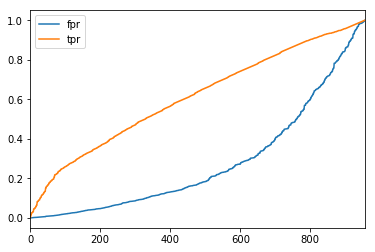

In [39]:
lr_model = logreg.fit(X_train, y_train)
lr_preds = lr_model.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_preds)
lr_df = pd.DataFrame(dict(fpr=lr_fpr, tpr=lr_tpr))
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)

lr_df.plot()

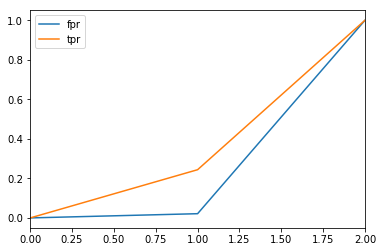

In [40]:
rf_model = rfc.fit(X_train, y_train)
rf_preds = rf_model.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)
rf_df = pd.DataFrame(dict(fpr=rf_fpr, tpr=rf_tpr))
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

rf_df.plot()

NameError: name 'RF_SM_df' is not defined

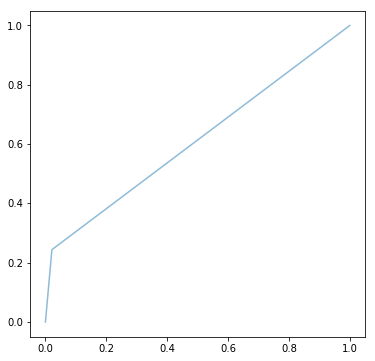

In [41]:
rf_fig = plt.figure(1, figsize=(6,6))

# plt.subplot()
# lr_many_features = plt.plot(lr_df.fpr, lr_df.tpr, label='LR Many Features', alpha=0.7)

# plt.subplot()
# lr_few_features = plt.plot(LR_SM_df.fpr, LR_SM_df.tpr, label='LR Few Features', alpha=0.7)

plt.subplot()
rf_many_features = plt.plot(rf_df.fpr, rf_df.tpr, label='RF Many Features', alpha=0.5)

plt.subplot()
rf_few_features = plt.plot(RF_SM_df.fpr, RF_SM_df.tpr, label='RF Few Features', alpha=0.5)

plt.xlabel('False Positive Rate',{'fontsize':20},color='#0b5394')
plt.ylabel('True Positive Rate',{'fontsize':20},color='#0b5394')

plt.title("Random Forest ROC",{'fontsize':25},color='#0b5394')
# plt.legend(handles=many_features)

plt.show()

In [ ]:
rf_fig.savefig('yuck_roc_draft.png')

## Adding Subplot from Other File

DATAFRAME FOR RANDOM FOREST WITH FEW FEATURES 

In [ ]:
path = '/Users/Winnifred/Desktop/Capstone/diagnosis_capstone/src/basic_roc_df.csv'

In [ ]:
RF_SM_df = pd.read_csv(path)

DATAFRAME FOR RANDOM FOREST WITH FEW FEATURES 

In [ ]:
path = '/Users/Winnifred/Desktop/Capstone/diagnosis_capstone/src/lr_basic_roc_df.csv'

In [ ]:
LR_SM_df = pd.read_csv(path)

## Feature Importances 

In [ ]:
importances = rfc.feature_importances_

In [ ]:
importances

In [ ]:
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{} feature {} {}".format(f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
idx_ranks = [242,243,241,240,759,213,232,234,193,758,279,239,204,203,237,746,575,215,249,248]

In [ ]:
len(idx_ranks)

In [ ]:
all_features =list(X_df)

In [ ]:
top_20 = []
for item in idx_ranks:
    top_20.append(all_features[item])

In [ ]:
top_20

In [ ]:
from COORDINATOR import *
data_file = '/Users/Winnifred/Desktop/Capstone/ICPSR_20240_RAWDATA/DS0001/20240-0001-Data.tsv'
filenames = '/Users/Winnifred/Desktop/Capstone/diagnosis_capstone/data/feature_group_file_names.txt'
csv_root_path = '/Users/Winnifred/Desktop/Capstone/diagnosis_capstone/data/feature_name_data/'
set_inst = Setup(csv_root_path, filenames)
full_dict = set_inst.execute_setup()

In [ ]:
full_dict

In [ ]:
for feature in top_20:
    for key, pair in full_dict.items():
        for akey, apair in pair.items():
            if akey == feature: 
                print(apair)